<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Interstellar-extinction" data-toc-modified-id="Interstellar-extinction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Interstellar extinction</a></span><ul class="toc-item"><li><span><a href="#Fig.-2:-extinction-law" data-toc-modified-id="Fig.-2:-extinction-law-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fig. 2: extinction law</a></span></li><li><span><a href="#Fig.-1:-G-band-extinction-toward-US" data-toc-modified-id="Fig.-1:-G-band-extinction-toward-US-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fig. 1: G-band extinction toward US</a></span></li></ul></li><li><span><a href="#Age-analysis-of-a-young-association" data-toc-modified-id="Age-analysis-of-a-young-association-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Age analysis of a young association</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Computation-of-ages-and-masses-for-the-full-sample" data-toc-modified-id="Computation-of-ages-and-masses-for-the-full-sample-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Computation of ages and masses for the full sample</a></span></li><li><span><a href="#Fig.-3:-scatter-plot-of-ages-and-masses-of-Scorpius-Centaurus-members" data-toc-modified-id="Fig.-3:-scatter-plot-of-ages-and-masses-of-Scorpius-Centaurus-members-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fig. 3: scatter plot of ages and masses of Scorpius-Centaurus members</a></span></li></ul></li><li><span><a href="#Mass-of-the-four-planets-in-the-HR-8799-system" data-toc-modified-id="Mass-of-the-four-planets-in-the-HR-8799-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mass of the four planets in the HR 8799 system</a></span><ul class="toc-item"><li><span><a href="#Fig.-5:-comparison-with-literature-estimates" data-toc-modified-id="Fig.-5:-comparison-with-literature-estimates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fig. 5: comparison with literature estimates</a></span></li></ul></li><li><span><a href="#Stellar-parameters" data-toc-modified-id="Stellar-parameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stellar parameters</a></span><ul class="toc-item"><li><span><a href="#Fig.-4:-interferometric-vs-photometric-radii" data-toc-modified-id="Fig.-4:-interferometric-vs-photometric-radii-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fig. 4: interferometric vs photometric radii</a></span></li></ul></li></ul></div>

In [34]:
from astropy_healpix import HEALPix
from astropy.coordinates import Distance
from scipy import interpolate
from madys import *
import os
from matplotlib.ticker import ScalarFormatter

## Interstellar extinction

### Fig. 2: extinction law

Input data, taken from Wang & Chen (2019) and Gordon et al. (2021):

In [2]:
# ---------------Wang & Chen (2019)==WC19--------------------------------------------------------
# Table 3
l=np.array([0.5387,0.7667,0.4525,0.5525,0.3602,0.4784,0.6166,0.7483,
            0.8915,0.4957,0.6211,0.7522,0.8671,0.9707,1.2345,1.6393,
            2.1757,3.3172,4.5501,11.7281,0.6419]) # lambda (micron)
a=np.array([1.002,0.589,1.317,1,1.584,1.205,0.848,0.63,0.458,1.155,
            0.843,0.628,0.487,0.395,0.243,0.131,0.078,0.039,0.026,
            0.040,0.789]) #Aλ/AV

# --------------Gordon et al. (2021)==G21------------------------------------------------------
# spectroscopic data, Table 8
l2=np.array([5.31,5.53,5.76,6,6.24,6.5,6.77,7.04,7.33,7.63,
             7.95,8.27,8.62,8.97,9.34,9.72,10.12,10.54,10.97,
             11.42,11.89,12.38,12.89,13.42,13.97,14.55,15.14,
             15.77,16.41,17.09,17.79,18.52,19.28,20.08,20.90,
             21.76,22.66,23.69,24.56,25.57,26.62,27.71,28.85,30.04,31.27]) #lambda (micron)
a2=np.array([0.0293,0.0279,0.0294,0.026,0.0262,0.0266,0.024,
             0.0267,0.0266,0.0278,0.0304,0.0343,0.0381,0.0532,
             0.0712,0.0816,0.0784,0.0659,0.0568,0.0475,0.0396,
             0.0294,0.0286,0.028,0.0238,0.0263,0.0259,0.0273,
             0.0335,0.0328,0.0353,0.0366,0.0339,0.0369,0.0377,
             0.0376,0.0356,0.0356,0.0365,0.0371,0.0243,0.0278,0.0249,0.0198,0.0237]) #k(lambda)

# best-fit parameters, Table 6 (diffuse)
B, alpha, S1, S2 = 0.366, 1.48, 0.06893, 0.02684
l01, g01, a01, l02, g02, a02 = 9.865, 2.507, -0.232, 19.973, 16.989, -0.273

Derived extinction curve:

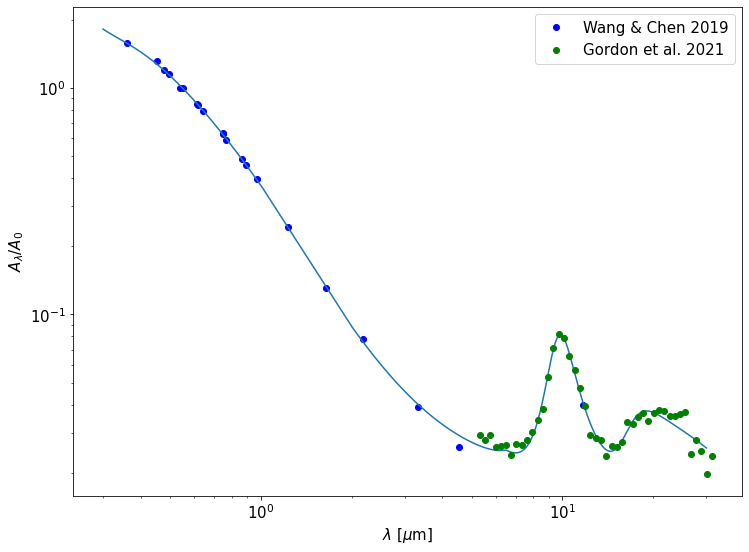

In [3]:
def curve(x,p1=1,p2=2,p3=6.5,p4=40):
    
    ec1=lambda x: 1.+0.7499*x-0.1086*x**2-0.08909*x**3+0.02905*x**4+0.01069*x**5+0.001707*x**6-0.001002*x**7
    ec2=lambda x: (0.3722)*x**(-2.07)
        
    g1=lambda x: 2*g01/(1+np.exp(a01*(x-l01)))
    g2=lambda x: 2*g02/(1+np.exp(a02*(x-l02)))
    d1=lambda x: (g1(x)/l01)**2/((x/l01-l01/x)**2+(g1(x)/l01)**2)
    d2=lambda x: (g2(x)/l02)**2/((x/l02-l02/x)**2+(g2(x)/l02)**2)        
    k=lambda x: B*x**(-alpha)+S1*d1(x)+S2*d2(x)

    step=lambda k1, k2, x: np.heaviside(x-k1,0)-np.heaviside(x-k2,0)
    q=lambda x: (x-p2)/(p3-p2)
    
    wc=lambda x: step(0,p1,x)*ec1(1/x-1.82)+step(p1,p2,x)*ec2(x)+step(p2,p3,x)*(q(x)*k(x)+(1-q(x))*ec2(x))+step(p3,p4,x)*k(x)
    
    return wc(x)

#------------plots Fig. 2------------------------------

x3=np.arange(0.3,30,0.01)
plt.figure(figsize=(12,9))
plt.plot(l,a,'bo',label='Wang & Chen 2019')
plt.plot(x3,curve(x3))
plt.plot(l2,a2,'go',label='Gordon et al. 2021')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ [$\mu$m]',size=15)
plt.ylabel(r'$A_{\lambda}$/$A_0$',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Fig. 1: G-band extinction toward US

Loads data from the Plack catalog (857 GHz) and compares it with the integrated extinction obtained by MADYS (map by Leike et al. 2020).

In [2]:
opl = 'planck_857ghz.fits' #output file
if os.path.isfile(opl)==False:
    urllib.request.urlretrieve('http://pla.esac.esa.int/pla-sl/data-action?MAP.MAP_OID=13624',opl)

A=fits.open(opl)
im=A[1].data['I_STOKES']
hp = HEALPix(nside=2048, order='nested')
n=len(im)
px=np.arange(0,n)

# converts HEALPIX to galactic and equatorial coordinates
lon, lat = hp.healpix_to_lonlat(px)
l=lon.degree
b=lat.degree
c = SkyCoord(l=l*u.degree, b=b*u.degree,frame='galactic')
c_radec=c.transform_to('icrs')
ra=c_radec.ra.deg
dec=c_radec.dec.deg

# selects the region of interest
w,=np.where((ra>236) & (ra<252) & (dec>-30) & (dec<-16))
points=(ra[w],dec[w])

# interpolates across data points
grid_x=np.linspace(236,252,1000)
grid_y=np.linspace(-30,-16,1000)
XX, YY = np.meshgrid(grid_x,grid_y)
xi=(XX,YY)
dat=interpolate.griddata(points, im[w], xi, method='linear', fill_value=np.nan, rescale=False)

Builds a composite figure: on the left the extinction map by MADYS, on the right from the Planck map:

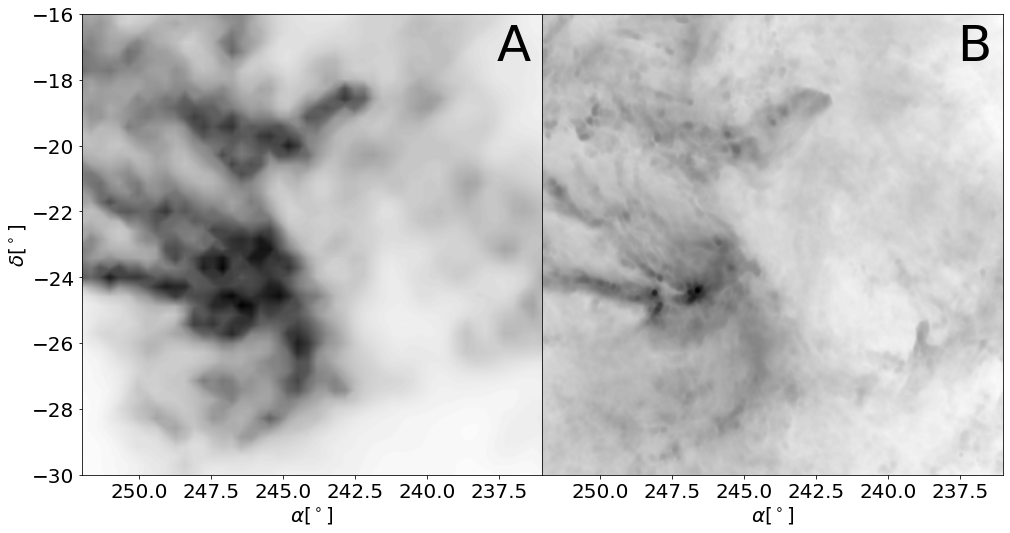

In [3]:
fontsize=20

fig, ax = plt.subplots(1,2,figsize=(16,8),sharey=True)     
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9, 
                    wspace=0.0, 
                    hspace=0.0)

SampleObject.plot_2D_ext(ra=[236,252],dec=[-30,-16],d=160,color='G',reverse_xaxis=True,cmap='gray_r',fontsize=fontsize,colorbar=False,ax=ax[0])

ax[1].contour(XX,YY,np.log10(dat),100,cmap='gray_r')
ax[1].contourf(XX,YY,np.log10(dat),100,cmap='gray_r')
ax[1].invert_xaxis()
ax[1].xaxis.set_tick_params(labelsize=fontsize)
ax[1].yaxis.set_tick_params(labelsize=fontsize)
x0_ticks = ax[0].xaxis.get_major_ticks()
x1_ticks = ax[1].xaxis.get_major_ticks()
x1_ticks[-1].label1.set_visible(False) ## set first x tick label invisible
ax[1].yaxis.set_tick_params(which='minor', bottom=False)
ax[1].yaxis.set_tick_params(which='major', bottom=False)
ax[1].set_xlabel(r'$\alpha [^\circ]$',fontsize=fontsize)
ax[0].annotate('A',(0.9,0.9),xycoords='axes fraction',color='black',fontsize=50)
ax[1].annotate('B',(0.9,0.9),xycoords='axes fraction',color='black',fontsize=50)
plt.show()

## Age analysis of a young association

### Loading data

Loads the catalog of bona-fide Sco-Cen members (Damiani et al. 2019). Note that the data are automatically stored in a file, if verbose>0. They can be loaded, instead of rerunning the query, setting the named keyword get_phot=True.

In [5]:
file='damiani_members.txt' #file available on GitHub
dam0 = pd.read_fwf(file, sep=' ', header=0, comment='#')
w_pv,=np.where(dam0['S']=='pv')
dam=dam0.iloc[w_pv,:] #bona fide sources

ra = dam['RAJ2000'].to_numpy()
dec = dam['DEJ2000'].to_numpy()
par = dam['Plx'].to_numpy()
dam_ids = dam['source_id'].to_numpy()
dam_ids_list = ['Gaia DR2 '+str(i) for i in dam_ids]

file='damiani_sample_data.csv' #output file: file (without extension)+'_phot_table.csv'

scocen_obj=SampleObject(dam_ids_list,id_type='DR2',mock_file=file,ext_map='leike')

# manual selection of kinematic data to define subregions
ra, dec = np.array(scocen_obj.phot_table['ra'].filled(np.nan)), np.array(scocen_obj.phot_table['dec'].filled(np.nan))
coo = SkyCoord(ra = ra*u.deg, dec = dec*u.deg, distance = Distance(parallax = scocen_obj.par*u.mas))
gc0 = coo.transform_to(Galactic)
gl, gb = gc0.l.deg, gc0.b.deg
    
ucl,=np.where((gl<343) & (gl>313) & (gb<25) & (gb>0))
us,=np.where((gl>343) & (gl<360) & (gb<30) & (gb>10))
lcc,=np.where((gl<313) & (gl>280) & (gb<23) & (gb>-10))



Total time needed to retrieve photometry for 10394 targets: - 00:02:28.86
Time for the computation of extinctions: 3.40 s


### Computation of ages and masses for the full sample

In [6]:
scocen_res1=scocen_obj.get_params('bhac15',age_range=[1,300],n_try=100)

Program running. Done: 105/10394 (1.0%). Estimated time left: 5909 s.
Program running. Done: 220/10394 (2.1%). Estimated time left: 5576 s.
Program running. Done: 346/10394 (3.3%). Estimated time left: 5245 s.
Program running. Done: 471/10394 (4.5%). Estimated time left: 5076 s.
Program running. Done: 576/10394 (5.5%). Estimated time left: 5149 s.
Program running. Done: 703/10394 (6.8%). Estimated time left: 4993 s.
Program running. Done: 851/10394 (8.2%). Estimated time left: 4743 s.
Program running. Done: 971/10394 (9.3%). Estimated time left: 4690 s.
Program running. Done: 1094/10394 (10.5%). Estimated time left: 4623 s.
Program running. Done: 1213/10394 (11.7%). Estimated time left: 4570 s.
Program running. Done: 1323/10394 (12.7%). Estimated time left: 4552 s.
Program running. Done: 1427/10394 (13.7%). Estimated time left: 4554 s.
Program running. Done: 1511/10394 (14.5%). Estimated time left: 4615 s.
Program running. Done: 1609/10394 (15.5%). Estimated time left: 4622 s.
Program 

### Fig. 3: scatter plot of ages and masses of Scorpius-Centaurus members

A graphical rendering of the above results. Only stars with $M>0.8 M_\odot$ and $t<60$ Myr are shown.

Here a convenience function to create the KDE insets, combining the matplotlib and seaborn libraries:

In [22]:
#import numpy as np
#from astropy.table import Table
#from astropy.constants import M_jup,M_earth
#import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd

def KDE_plot(dat,x_name,y_name,label,ids=None,**kwargs):

    if isinstance(dat,list):
        for i in range(len(dat)):
            dat[i]['label']=label[i]
        dat=pd.concat(dat,ignore_index=True)
        label='label'
    

    W=np.arange(0,len(dat),dtype=int) if type(ids)==type(None) else ids
    
    disc_m=np.unique(dat[label])
    for i in range(len(disc_m)):
        w,=np.where((dat[label][W]==disc_m[i]))
        nw=len(w)
    det=dat[label][W].to_numpy()
    disc_m1=np.unique(det)

    x = dat[x_name].to_numpy()
    y = dat[y_name].to_numpy()    
    if type(ids)!=type(None):
        x=x[ids]
        y=y[ids]

    xlog=kwargs['xlog'] if 'xlog' in kwargs else True
    ylog=kwargs['ylog'] if 'ylog' in kwargs else True
    close=kwargs['close'] if 'close' in kwargs else True

    figsize=kwargs['figsize'] if 'figsize' in kwargs else [16,12]
    fontsize=kwargs['fontsize'] if 'fontsize' in kwargs else 15
    
    fig = plt.figure(figsize=(figsize[0], figsize[1]))
    
    # definitions for the axes
    left, width = 0.1, 0.95
    bottom, height = 0.1, 0.95
    spacing = 0.00

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    ax = fig.add_axes(rect_scatter)
    
    
    # upper subplot
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    sns.kdeplot(data=dat.iloc[W],x=x_name,hue=label,log_scale=xlog,cbar_ax=ax_histx,common_norm=False, hue_order=disc_m1,legend=False,linewidth=3)
    ax_histx.set_xlabel('')
    ax_histx.yaxis.set_tick_params(labelsize=fontsize)
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.set_ylabel('PDF',fontsize=fontsize)

    # right subplot
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    sns.kdeplot(data=dat.iloc[W],y=y_name,hue=label,log_scale=ylog,cbar_ax=ax_histy,common_norm=False, hue_order=disc_m1,legend=False,linewidth=3)
    ax_histy.set_ylabel('')
    ax_histy.set_xlabel('PDF',fontsize=fontsize)
    ax_histy.xaxis.set_tick_params(labelsize=fontsize)
    ax_histy.tick_params(axis="y", labelleft=False)

    # main scatter plot
    for i in range(len(disc_m1)):
        w,=np.where(det==disc_m1[i])
        nw=len(w)
        ax.plot(x[w],y[w],marker='o',markersize=6,label=disc_m1[i]+' ('+str(nw)+')',linestyle='',alpha=0.5)
        

    # plot settings
    if xlog: ax.set_xscale('log')
    if ylog: ax.set_yscale('log')
    ax.set_xlabel(x_name,fontsize=fontsize)
    ax.set_ylabel(y_name,fontsize=fontsize)
    ax.set_xlim([0.9*np.nanmin(x),1.1*np.nanmax(x)])
    ax.set_ylim([0.9*np.nanmin(y),1.1*np.nanmax(y)])
#    ax.xaxis.set_tick_params(labelsize=fontsize)
#    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.set_xticks([])
    ax.set_yticks([])
    legend=ax.legend(loc=4,fontsize=fontsize,markerscale=2)
#    legend.legendHandles[-1]._legmarker.set_markersize(12)
    if close: plt.show()

    return fig,ax,ax_histx,ax_histy


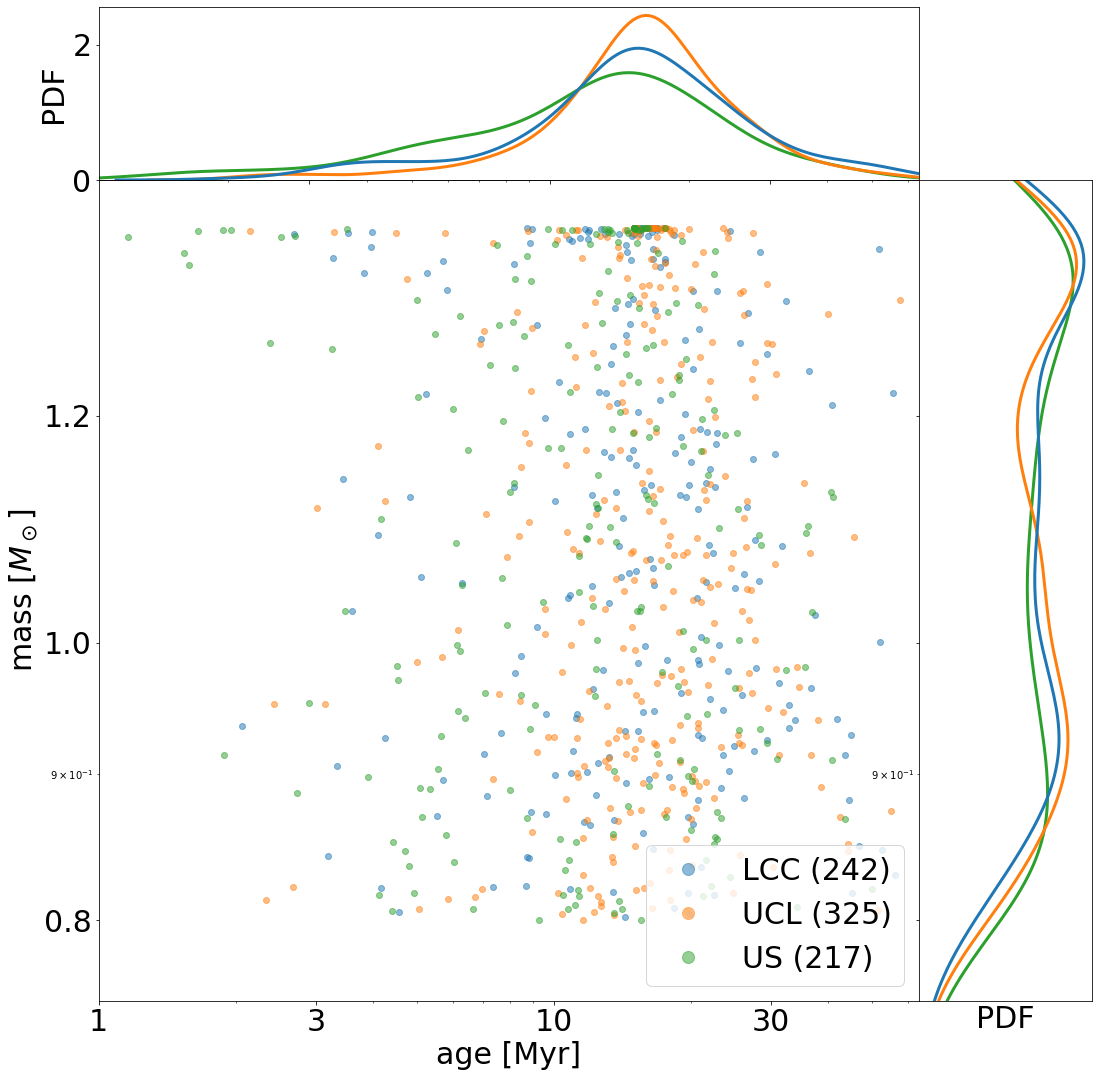

In [23]:
data=scocen_res1
n1=len(data['all_solutions'])
    
ages1, masses1 = data['ages'], data['masses']

label=['US','UCL','LCC']

db1=pd.DataFrame({'ages':ages1[us],'masses':masses1[us]})
db2=pd.DataFrame({'ages':ages1[ucl],'masses':masses1[ucl]})
db3=pd.DataFrame({'ages':ages1[lcc],'masses':masses1[lcc]})

dat=pd.concat([db1,db2,db3],ignore_index=True)

w,=np.where((dat['masses']>0.8) & (dat['ages']<60))
fontsize=30

fig, ax, __, __ = KDE_plot([db1,db2,db3],'ages','masses',label,figsize=(12,12),ids=w,close=False,fontsize=fontsize)
ax.set_ylim([0.75,1.45])
ax.set_xlabel('age [Myr]',fontsize=fontsize)
ax.set_ylabel(r'mass [$M_\odot$]',fontsize=fontsize)
plt.xticks([])
plt.yticks([])
ax.xaxis.set_ticks([1,3,10,30])
ax.yaxis.set_ticks([0.8,1,1.2])
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)    
ax.yaxis.set_major_formatter(formatter)    
plt.show()

## Mass of the four planets in the HR 8799 system

In [ ]:
J, dJ, H, dH, K, dK = 5.383, 0.027, 5.280, 0.018, 5.240, 0.018 #2MASS magnitude and uncertainties for the primary star
par, par_err = 24.4620, 0.0455 #Gaia EDR3 parallax

age_old=[45,30,60] #[age optimal, age min, age max]
age_young=[17,10,23]

# creates a Table with all photometric data. Contrasts from Zurlo et al. (2016)
dic = {'object_name': ['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'],
       'SPH_J': [14.39+J, 13.21+J, 13.20+J, 13.01+J],
       'SPH_H2': [12.80+H, 11.81+H, 11.74+H, 11.63+H],
       'SPH_H3': [12.50+H, 11.50+H, 11.57+H, 11.40+H],
       'SPH_K1': [11.91+K, 10.95+K, 10.96+K, 10.88+K],
       'SPH_K2': [11.73+K, 10.62+K, 10.60+K, 10.58+K],
       'SPH_J_err': [np.sqrt(dJ**2+0.09**2),np.sqrt(dJ**2+0.13**2),np.sqrt(dJ**2+0.37**2),np.sqrt(dJ**2+0.21**2)],
       'SPH_H2_err': [np.sqrt(dH**2+0.14**2),np.sqrt(dH**2+0.12**2),np.sqrt(dH**2+0.17**2),np.sqrt(dH**2+0.20**2)],
       'SPH_H3_err': [np.sqrt(dH**2+0.10**2),np.sqrt(dH**2+0.10**2),np.sqrt(dH**2+0.16**2),np.sqrt(dH**2+0.21**2)],
       'SPH_K1_err': [np.sqrt(dK**2+0.06**2),np.sqrt(dK**2+0.05**2),np.sqrt(dK**2+0.07**2),np.sqrt(dK**2+0.10**2)],
       'SPH_K2_err': [np.sqrt(dK**2+0.09**2),np.sqrt(dK**2+0.07**2),np.sqrt(dK**2+0.10**2),np.sqrt(dK**2+0.11**2)],
       'parallax': [par, par, par, par],
       'parallax_err': [par_err, par_err, par_err, par_err]
      }
file=Table(dic)

obj=SampleObject(file,verbose=0,ext_map=None)
res1=obj.get_params('ames_dusty',mass_range=[0.001,0.05],age_range=np.array([age_old,age_old,age_old,age_old]),m_unit='m_jup',ph_cut=0.8,n_try=5000)
res2=obj.get_params('ames_dusty',mass_range=[0.001,0.05],age_range=np.array([age_young,age_young,age_young,age_young]),m_unit='m_jup',ph_cut=0.8,n_try=5000)
res5=obj.get_params('ames_cond',mass_range=[0.001,0.05],age_range=np.array([age_old,age_old,age_old,age_old]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)
res6=obj.get_params('ames_cond',mass_range=[0.001,0.05],age_range=np.array([age_young,age_young,age_young,age_young]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)

# same as above, but for atmo2020 we must pretend that the filters are in the MKO system
dic2 = {'object_name': ['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'],
   'MKO_J': [14.39+J, 13.21+J, 13.20+J, 13.01+J],
   'MKO_H': [12.65+H, 11.65+H, 11.63+H, 11.51+H],
   'MKO_K': [11.73+K, 10.62+K, 10.60+K, 10.58+K],
   'MKO_J_err': [np.sqrt(dJ**2+0.09**2),np.sqrt(dJ**2+0.13**2),np.sqrt(dJ**2+0.37**2),np.sqrt(dJ**2+0.21**2)],
   'MKO_H_err': [np.sqrt(dH**2+0.12**2),np.sqrt(dH**2+0.11**2),np.sqrt(dH**2+0.17**2),np.sqrt(dH**2+0.20**2)],
   'MKO_K_err': [np.sqrt(dK**2+0.09**2),np.sqrt(dK**2+0.07**2),np.sqrt(dK**2+0.10**2),np.sqrt(dK**2+0.11**2)],
   'parallax': [par, par, par, par],
   'parallax_err': [par_err, par_err, par_err, par_err]
  }
file2=Table(dic2)
obj2=SampleObject(file2,verbose=0,ext_map=None)
res3=obj2.get_params('atmo2020_ceq',mass_range=[0.001,0.05],age_range=np.array([age_old,age_old,age_old,age_old]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)
res4=obj2.get_params('atmo2020_ceq',mass_range=[0.001,0.05],age_range=np.array([age_young,age_young,age_young,age_young]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)


# same as above, but for sonora_bobcat we must pretend that the filters are in the 2MASS system

dic3 = {'object_name': ['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'],
   'J': [14.39+J, 13.21+J, 13.20+J, 13.01+J],
   'H': [12.65+H, 11.65+H, 11.63+H, 11.51+H],
   'K': [11.73+K, 10.62+K, 10.60+K, 10.58+K],
   'J_err': [np.sqrt(dJ**2+0.09**2),np.sqrt(dJ**2+0.13**2),np.sqrt(dJ**2+0.37**2),np.sqrt(dJ**2+0.21**2)],
   'H_err': [np.sqrt(dH**2+0.12**2),np.sqrt(dH**2+0.11**2),np.sqrt(dH**2+0.17**2),np.sqrt(dH**2+0.20**2)],
   'K_err': [np.sqrt(dK**2+0.09**2),np.sqrt(dK**2+0.07**2),np.sqrt(dK**2+0.10**2),np.sqrt(dK**2+0.11**2)],
   'parallax': [par, par, par, par],
   'parallax_err': [par_err, par_err, par_err, par_err]
  }
file3=Table(dic3)
obj3=SampleObject(file3,verbose=0,ext_map=None)

res7=obj3.get_params('sonora_bobcat',mass_range=[0.001,0.05],age_range=np.array([age_old,age_old,age_old,age_old]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)
res8=obj3.get_params('sonora_bobcat',mass_range=[0.001,0.05],age_range=np.array([age_young,age_young,age_young,age_young]),m_unit='m_jup',ph_cut=0.8,n_try=5000,save_maps=True)

Here the results:

In [30]:
pl=['b','c','d','e']
print('AMES-Dusty, age in ['+str(age_old[1])+','+str(age_old[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res1['masses'][i],'-',res1['masses'][i]-res1['masses_min'][i],'+',res1['masses_max'][i]-res1['masses'][i],res1['chi2_min'][i])
print('AMES-Dusty, age in ['+str(age_young[1])+','+str(age_young[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res2['masses'][i],'-',res2['masses'][i]-res2['masses_min'][i],'+',res2['masses_max'][i]-res2['masses'][i],res2['chi2_min'][i])
print('ATMO2020_CEQ, age in ['+str(age_old[1])+','+str(age_old[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res3['masses'][i],'-',res3['masses'][i]-res3['masses_min'][i],'+',res3['masses_max'][i]-res3['masses'][i],res3['chi2_min'][i])
print('ATMO2020_CEQ, age in ['+str(age_young[1])+','+str(age_young[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res4['masses'][i],'-',res4['masses'][i]-res4['masses_min'][i],'+',res4['masses_max'][i]-res4['masses'][i],res4['chi2_min'][i])
print('AMES-Cond, age in ['+str(age_old[1])+','+str(age_old[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res5['masses'][i],'-',res5['masses'][i]-res5['masses_min'][i],'+',res5['masses_max'][i]-res5['masses'][i],res5['chi2_min'][i])
print('AMES-Cond, age in ['+str(age_young[1])+','+str(age_young[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res6['masses'][i],'-',res6['masses'][i]-res6['masses_min'][i],'+',res6['masses_max'][i]-res6['masses'][i],res6['chi2_min'][i])
print('Sonora Bobcat, age in ['+str(age_old[1])+','+str(age_old[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res7['masses'][i],'-',res7['masses'][i]-res7['masses_min'][i],'+',res7['masses_max'][i]-res7['masses'][i],res7['chi2_min'][i])
print('Sonora Bobcat, age in ['+str(age_young[1])+','+str(age_young[2])+'] Myr: ')
for i in range(4): print('    ',pl[i],res8['masses'][i],'-',res8['masses'][i]-res8['masses_min'][i],'+',res8['masses_max'][i]-res8['masses'][i],res8['chi2_min'][i])


AMES-Dusty, age in [30,60] Myr: 
     b 10.726586045344485 - 1.0767499397915845 + 0.3849828170596439 155.49341233226923
     c 11.287078424993258 - 0.6024362898021192 + 0.35937954396905347 85.68013216077958
     d 11.111568862404129 - 0.7566271243852931 + 0.3988000529261697 28.744086124959892
     e 11.420527477098076 - 0.6095589967419102 + 0.3175492490837133 32.62366670124429
AMES-Dusty, age in [10,23] Myr: 
     b 6.889496530646523 - 1.1811075468293426 + 0.9509050975219768 170.52164157080452
     c 7.779205243954023 - 1.3336356265072853 + 1.004605584365355 100.48265871921464
     d 7.509678916359036 - 1.3601362096797205 + 0.9366418908994518 33.60185255600211
     e 7.933100033017297 - 1.3342152699403345 + 1.0244795380212057 38.08674958463885
ATMO2020_CEQ, age in [30,60] Myr: 
     b 6.521776685683211 - 0.9460135196807089 + 0.8711297221339809 322.0497405547501
     c 10.896014723527177 - 1.2082969693907746 + 0.7504432454351342 181.31933895182846
     d 11.420527477098076 - 1.065585739

Or, in a fancier way:

In [29]:
res1.pprint('in_notebook')

idx,objects,ages,ages_min,ages_max,masses,masses_min,masses_max,ebv,radii,radii_min,radii_max,logg,logg_min,logg_max,logL,logL_min,logL_max,Teff,Teff_min,Teff_max,fit_status
0,HR 8799 b,45.0,30.0,60.0,10.726586045344485,9.6498361055529,11.111568862404129,0.0,1.2638120290851649,1.2553991293134004,1.2857150303887832,4.221796528917963,4.159717116204392,4.241182196477033,-4.454835701095153,-4.464625715444916,-4.446226024106882,1242.5333715108784,1231.4688972208305,1249.755673152793,0
1,HR 8799 c,45.0,30.0,60.0,11.287078424993258,10.684642135191138,11.646457968962311,0.0,1.2888832728497563,1.2792358434214872,1.3000009949069842,4.225809349871437,4.193868408287414,4.245330838189617,-4.320227904199757,-4.3299083953496895,-4.308479525728149,1335.5407543850101,1325.289430974386,1342.643766980628,0
2,HR 8799 d,45.0,30.0,60.0,11.111568862404129,10.354941738018836,11.510368915330298,0.0,1.2813275707258382,1.2729670414086813,1.290693864896021,4.22455279674803,4.186640707048044,4.244275320854152,-4.361275306231002,-4.374685197920626,-4.348108900374891,1307.2861669390866,1293.4379660104887,1316.045678581324,0
3,HR 8799 e,45.0,30.0,60.0,11.420527477098076,10.810968480356166,11.73807672618179,0.0,1.2935188001175866,1.2833187273239688,1.305303771052266,4.226764772588946,4.1954511572965085,4.24604144043071,-4.294009941965497,-4.310823281255717,-4.278532149837249,1350.621538120035,1340.962100053159,1360.566322007438,0


### Fig. 5: comparison with literature estimates

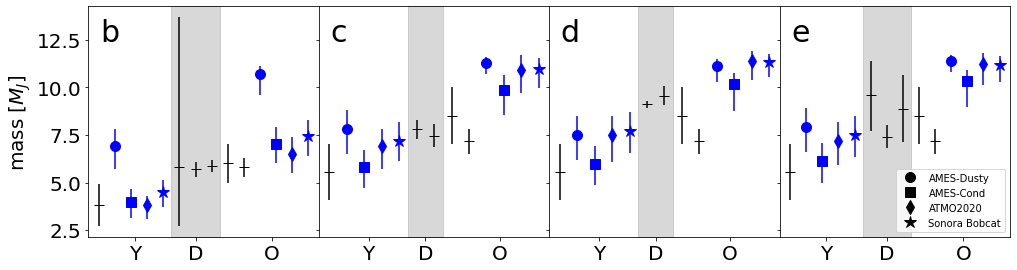

In [27]:
b_y=np.array([[3.8,1.1,1.1]])
b_o=np.array([[6,1,1],[5.8,0.5,0.5]])
b_y_madys=np.array([[6.9,1.2,0.9],[4.0,0.85,0.64],[3.8,0.7,0.5],[4.49,0.76,0.66]])
b_o_madys=np.array([[10.7,1.1,0.4],[7.0,1.0,0.9],[6.5,1.0,0.9],[7.45,1.08,0.83]])
z22=(5.54+6.20)/2
b_dyn=np.array([[5.8,3.1,7.9],[5.7,0.4,0.4],[z22,z22-5.54,6.20-z22]])

c_y=np.array([[5.55,1.45,1.45]])
c_o=np.array([[8.5,1.5,1.5],[7.2,0.7,0.6]])
c_y_madys=np.array([[7.8,1.3,1],[5.8, 1.07, 0.9],[6.9,1.2,0.9],[7.19,1.07,0.99]])
c_o_madys=np.array([[11.3,0.6,0.3],[9.88, 1.33,0.76],[10.9,1.2,0.8],[10.98,0.99,0.57]])
z22=(6.84+8.10)/2
c_dyn=np.array([[7.8,0.5,0.5],[z22,z22-6.84,8.10-z22]])

d_y=np.array([[5.55,1.45,1.45]])
d_o=np.array([[8.5,1.5,1.5],[7.2,0.7,0.6]])
d_y_madys=np.array([[7.5,1.3,1],[5.96,1.1,0.96],[7.5,1.4,1.0],[7.69,1.14,1.03]])
d_o_madys=np.array([[11.1,0.8,0.4],[10.15,1.37,0.61],[11.4,1.0,0.5],[11.33,0.81,0.41]])
z22=(9.07+10.05)/2
d_dyn=np.array([[9.1,0.2,0.2],[z22,z22-9.07,10.05-z22]])

e_y=np.array([[5.55,1.45,1.45]])
e_o=np.array([[8.5,1.5,1.5],[7.2,0.7,0.6]])
e_y_madys=np.array([[7.9,1.3,1],[6.12,1.13,0.98],[7.2,1.3,1.0],[7.48,1.13,1.0]])
e_o_madys=np.array([[11.4,0.6,0.3],[10.35,1.36,0.54],[11.2,1.1,0.6],[11.16,0.88,0.49]])
z22=(7.11+10.66)/2
e_dyn=np.array([[9.6,1.9,1.8],[7.4,0.6,0.6],[z22,z22-7.11,10.66-z22]])


msize=[10,10,10,12]
mname=["o","s","d","*"]
msize_e=10

fig, ax = plt.subplots(1,4,figsize=(16, 4),sharey=True)

c=0
for i in range(len(b_y)): 
    ax[0].errorbar(c,b_y[i,0],yerr=np.array([[b_y[i,1]],[b_y[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(b_y_madys)): 
    ax[0].errorbar(c,b_y_madys[i,0],yerr=np.array([[b_y_madys[i,1]],[b_y_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
c1=c-0.5
for i in range(len(b_dyn)): 
    ax[0].errorbar(c,b_dyn[i,0],yerr=np.array([[b_dyn[i,1]],[b_dyn[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
c2=c-0.5
for i in range(len(b_o)): 
    ax[0].errorbar(c,b_o[i,0],yerr=np.array([[b_o[i,1]],[b_o[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(b_o_madys)): 
    ax[0].errorbar(c,b_o_madys[i,0],yerr=np.array([[b_o_madys[i,1]],[b_o_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
    
i_min=np.argmax(b_dyn[:,0]-b_dyn[:,1])
i_max=np.argmin(b_dyn[:,0]+b_dyn[:,2])
#plt.fill_between(np.linspace(0,c), b_dyn[i_max,1]+b_dyn[i_max,0], b_dyn[i_min,0]-b_dyn[i_min,1], color = 'pink', alpha=0.3)    
y_min, y_max = ax[0].get_ylim()
fs=13
ax[0].set_ylim([y_min,y_max])
ax[0].fill_between(np.linspace(c1,c2), y_max, y_min, color = 'gray', alpha=0.3)    
x1 = [0.5*c1,0.5*(c1+c2),0.5*(c+c2)]
tick_names = ['Y','D','O']
ax[0].set_xticks(x1)
ax[0].set_xticklabels(tick_names, minor=False)


c=0
for i in range(len(c_y)): 
    ax[1].errorbar(c,c_y[i,0],yerr=np.array([[c_y[i,1]],[c_y[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(c_y_madys)): 
    ax[1].errorbar(c,c_y_madys[i,0],yerr=np.array([[c_y_madys[i,1]],[c_y_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
c1=c-0.5
for i in range(len(c_dyn)): 
    ax[1].errorbar(c,c_dyn[i,0],yerr=np.array([[c_dyn[i,1]],[c_dyn[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
c2=c-0.5
for i in range(len(c_o)): 
    ax[1].errorbar(c,c_o[i,0],yerr=np.array([[c_o[i,1]],[c_o[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(c_o_madys)): 
    ax[1].errorbar(c,c_o_madys[i,0],yerr=np.array([[c_o_madys[i,1]],[c_o_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
    
i_min=np.argmax(c_dyn[:,0]-c_dyn[:,1])
i_max=np.argmin(c_dyn[:,0]+c_dyn[:,2])
#plt.fill_between(np.linspace(0,c), c_dyn[i_max,1]+c_dyn[i_max,0], c_dyn[i_min,0]-c_dyn[i_min,1], color = 'pink', alpha=0.3)    
ax[1].fill_between(np.linspace(c1,c2), y_max, y_min, color = 'gray', alpha=0.3)    
x1 = [0.5*c1,0.5*(c1+c2),0.5*(c+c2)]
tick_names = ['Y','D','O']
ax[1].set_xticks(x1)
ax[1].set_xticklabels(tick_names, minor=False)

c=0
for i in range(len(d_y)): 
    ax[2].errorbar(c,d_y[i,0],yerr=np.array([[d_y[i,1]],[d_y[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(d_y_madys)): 
    ax[2].errorbar(c,d_y_madys[i,0],yerr=np.array([[d_y_madys[i,1]],[d_y_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
c1=c-0.5
for i in range(len(d_dyn)): 
    ax[2].errorbar(c,d_dyn[i,0],yerr=np.array([[d_dyn[i,1]],[d_dyn[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
c2=c-0.5
for i in range(len(d_o)): 
    ax[2].errorbar(c,d_o[i,0],yerr=np.array([[d_o[i,1]],[d_o[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(d_o_madys)): 
    ax[2].errorbar(c,d_o_madys[i,0],yerr=np.array([[d_o_madys[i,1]],[d_o_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
    
i_min=np.argmax(d_dyn[:,0]-d_dyn[:,1])
i_max=np.argmin(d_dyn[:,0]+d_dyn[:,2])
#plt.fill_between(np.linspace(0,c), d_dyn[i_max,1]+d_dyn[i_max,0], d_dyn[i_min,0]-d_dyn[i_min,1], color = 'pink', alpha=0.3)    

ax[2].fill_between(np.linspace(c1,c2), y_max, y_min, color = 'gray', alpha=0.3)    
x1 = [0.5*c1,0.5*(c1+c2),0.5*(c+c2)]
tick_names = ['Y','D','O']
ax[2].set_xticks(x1)
ax[2].set_xticklabels(tick_names, minor=False)

models=['AMES-Dusty','AMES-Cond','ATMO2020','Sonora Bobcat']
c=0
for i in range(len(e_y)): 
    ax[3].errorbar(c,e_y[i,0],yerr=np.array([[e_y[i,1]],[e_y[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
for i in range(len(e_y_madys)): 
    ax[3].errorbar(c,e_y_madys[i,0],yerr=np.array([[e_y_madys[i,1]],[e_y_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
c1=c-0.5
for i in range(len(e_dyn)): 
    ax[3].errorbar(c,e_dyn[i,0],yerr=np.array([[e_dyn[i,1]],[e_dyn[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
c2=c-0.5
for i in range(len(e_o)): 
    ax[3].errorbar(c,e_o[i,0],yerr=np.array([[e_o[i,1]],[e_o[i,2]]]),marker='_',color='black',markersize=msize_e)
    c+=1
ll=[]
for i in range(len(e_o_madys)): 
    ax[3].errorbar(c,e_o_madys[i,0],yerr=np.array([[e_o_madys[i,1]],[e_o_madys[i,2]]]),marker=mname[i],color='blue',markersize=msize[i])
    c+=1
    
i_min=np.argmax(e_dyn[:,0]-e_dyn[:,1])
i_max=np.argmin(e_dyn[:,0]+e_dyn[:,2])
#plt.fill_between(np.linspace(0,c), e_dyn[i_max,1]+e_dyn[i_max,0], e_dyn[i_min,0]-e_dyn[i_min,1], color = 'pink', alpha=0.3)    

ax[3].fill_between(np.linspace(c1,c2), y_max, y_min, color = 'gray', alpha=0.3)    
x1 = [0.5*c1,0.5*(c1+c2),0.5*(c+c2)]
tick_names = ['Y','D','O']
ax[3].set_xticks(x1)
ax[3].set_xticklabels(tick_names, minor=False)

for i in range(4): ax[3].plot(0,100,label=models[i],color='black',marker=mname[i],linestyle='',markersize=msize[i])

ax[3].legend(loc=4)



#ax[1].set_yticks([])
#for i in range(4): ax[i].set_xticks([])
ax[0].set_ylabel(r'mass [$M_J$]',fontsize=20)

#plt.tight_layout(h_pad=0.01)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9,
                    top=0.9, 
                    wspace=0.0, 
                    hspace=0.01)

panel=['b','c','d','e']
for i in range(4): 
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].annotate(panel[i],(0.05,0.85),xycoords='axes fraction',fontsize=30)
    
plt.show()

## Stellar parameters

### Fig. 4: interferometric vs photometric radii

In [32]:
from uncertainties import ufloat, unumpy
from uncertainties.umath import *  # sin(), etc.

l_hub=['HD 173701','HD 175726','HD 177153','HD 181420','HD182736','HD187637'] #Huber et al., ApJ 760, 32 (2012)
l_boy1=['GJ 15A','GJ 33','GJ 105','GJ 166A','GJ 205','GJ 338A','GJ 338B','GJ 380','GJ 411','GJ 412A',
        'GJ 526','GJ 631','GJ 687','GJ 699','GJ 702A','GJ 702B','GJ 725A','GJ 725B','GJ 809','GJ 880','GJ 892']
l_boy2=['HD 4614','HD 5015','HD 6582','HD 10780','HD 16895','HD 19373','HD 20630','HD 22484','HD 30652',
        'HD 34411','HD 39587','HD 48737','HD 56537','HD 58946','HD 81937','HD 82328','HD 82885','HD 86728',
        'HD 90839','HD 95418','HD 97603','HD 101501','HD 102870','HD 103095','HD 109358','HD 114710',
        'HD 118098','HD 126660','HD 128167','HD 131156','HD 141795','HD 142860','HD 146233','HD 162003',
        'HD 164259','HD 173667','HD 177724','HD 182572','HD 185144','HD 185395','HD 210418','HD 213558',
        'HD 215648','HD 222368']

hub_radii=np.array([0.332,0.346,0.289,0.34,0.436,0.231])
hub_radii_err=np.array([0.006,0.007,0.006,0.01,0.005,0.006])
boy1_radii=np.array([1.005,0.868,1.030,1.504,0.943,0.871,0.856,1.225,1.432,0.764,0.835,0.724,0.859,0.952,1.515,1.221,0.937,0.851,0.722,0.744,1.106])
boy1_radii_err=np.array([0.005,0.004,0.007,0.006,0.004,0.015,0.016,0.009,0.013,0.017,0.014,0.011,0.014,0.005,0.005,0.015,0.008,0.015,0.008,0.004,0.007])
boy2_radii=np.array([1.623,0.846,0.947,0.744,1.078,1.217,0.914,1.056,1.488,0.958,1.027,1.369,0.824,0.837,1.113,1.591,0.8,0.753,0.778,
                     1.133,1.304,0.887,1.396,0.679,1.209,1.1,0.84,1.086,0.824,1.163,0.756,1.191,0.763,0.93,0.761,0.979,0.883,0.823,
                     1.219,0.845,0.849,0.625,1.068,1.059])
boy2_radii_err=np.array([0.004,0.01,0.009,0.018,0.008,0.007,0.024,0.014,0.004,0.015,0.009,0.009,0.013,0.013,0.009,0.005,0.012,0.012,0.014,
                         0.014,0.008,0.009,0.006,0.005,0.03,0.011,0.009,0.007,0.013,0.014,0.017,0.005,0.017,0.025,0.027,0.006,0.016,0.025,
                         0.011,0.015,0.017,0.021,0.008,0.009])

int_sample=list(np.hstack((l_hub,l_boy1,l_boy2)))
int_radii=np.hstack((hub_radii,boy1_radii,boy2_radii))
int_radii_err=np.hstack((hub_radii_err,boy1_radii_err,boy2_radii_err))

int_obj=SampleObject(int_sample,ext_map='leike',verbose=0,id_type='other')
p=np.array([ufloat(int_obj.par[i],int_obj.par_err[i]) for i in range(len(int_obj))])

r_interf, r_interf_err = np.array([i.n for i in int_radii/2/p*u.au.to(R_sun)]), np.array([i.s for i in int_radii/2/p*u.au.to(R_sun)])

hub_feh=np.array([0.34,-0.07,-0.09,0.00,-0.15,-0.17])
boy1_feh=np.array([-0.36,-0.22,-0.08,-0.24,0-35,-0.18,-0.15,-0.16,-0.41,-0.4,-0.3,
                  0.04,-0.09,-0.39,0.03,0.03,-0.49,-0.36,-0.21,0.06,0.07])
boy2_feh=np.array([-0.3,0.0,-0.83,0.05,-0.12,0.09,0.0,-0.09,-0.03,0.05,-0.16,0.01,
                  -0.31,0.06,-0.12,0.06,0.2,-0.16,0.06,0.2,-0.16,0.06,0.0,-0.12,
                  0.11,-1.36,-0.3,-0.06,-0.02,-0.14,-0.36,-0.33,-0.19,-0.02,
                  -0.17,-0.14,-0.15,-0.68,0.33,-0.24,-0.04,-0.38,-0.24,-0.08])
feh=np.hstack((hub_feh,boy1_feh,boy2_feh))

int_res=int_obj.get_params('parsec',age_range=[500,7000],verbose=False,feh=feh)

Program running. Done: 69/71 (97.2%). Estimated time left: 2 s.
Execution ended. Elapsed time: 62 s.


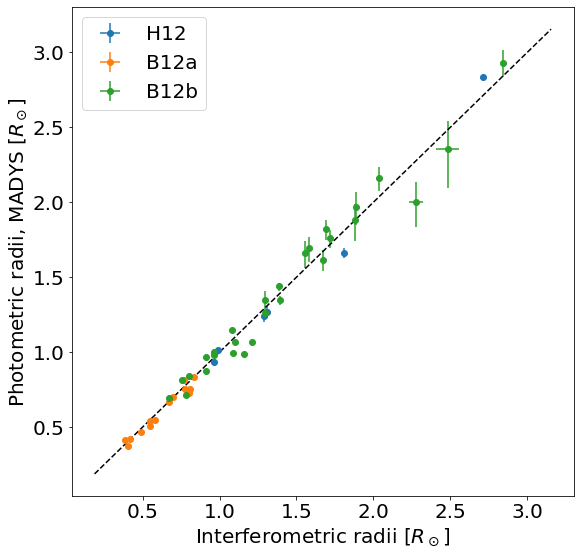

In [33]:
r_min=np.min([np.nanmin(r_interf),np.nanmin(int_res['radii'])])
r_max=np.max([np.nanmax(r_interf),np.nanmax(int_res['radii'])])

l1 = len(hub_radii)
l2 = l1+len(boy1_radii)

plt.figure(figsize=(9,9))
plt.errorbar(r_interf[0:l1],int_res['radii'][0:l1],xerr=r_interf_err[0:l1],yerr=np.vstack((int_res['radii_max']-int_res['radii'],int_res['radii']-int_res['radii_min']))[:,0:l1],fmt='o',label='H12')
plt.errorbar(r_interf[l1:l2],int_res['radii'][l1:l2],xerr=r_interf_err[l1:l2],yerr=np.vstack((int_res['radii_max']-int_res['radii'],int_res['radii']-int_res['radii_min']))[:,l1:l2],fmt='o',label='B12a')
plt.errorbar(r_interf[l2:],int_res['radii'][l2:],xerr=r_interf_err[l2:],yerr=np.vstack((int_res['radii_max']-int_res['radii'],int_res['radii']-int_res['radii_min']))[:,l2:],fmt='o',label='B12b')
plt.plot([r_min,r_max],[r_min,r_max],linestyle='dashed',color='black')
plt.xlabel(r'Interferometric radii [$R_\odot$]',fontsize=20)
plt.ylabel(r'Photometric radii, MADYS [$R_\odot$]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()